# 3. Experimentation Basics: PMF's and PDF's

*note: if you see any mistakes, please feel free to let me know so that I can improve the notebook!*

This notebook is a sequel to [1. basics](https://github.com/kideokkwon/experimentation-simulation-and-text-notes/blob/main/simulation/1_basics_standard_abtest_example.ipynb) and [2. basics](https://github.com/kideokkwon/experimentation-simulation-and-text-notes/blob/main/simulation/2_basics_additional_popular_tests_part1.ipynb)

In this notebook, we will talk about PMF's and PDF's. We'll visualize it and tie it to $p$-values and critical values.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## PDFs and PMFs Introduction

Last time we went over an example of a one-sample $Z$-test. To improve the intuition for the procedure, we can utilize graphs. However, before that can be done, we need to go over what PDF's and PMF's are.

First, imagine that we have a random variable $X$. Let's say that $X$ represents the probability distribution of one fair coin toss. Since it's random, there's no guarantee that it will be heads or tails. Instead, to represent information about this random variable, we map the probability of all the various inputs. So for $X$, the probability mass function would be $P(\text{heads})=0.5, P(\text{tails})=0.5$.

Of-course, a single coin-flipper isn't the only random variable out there. So naturally there's a lot of known probability distributions out there. When the value of $X$ is discrete (such as heads vs tails), we use a Probability Mass Function (PMF) and if it is continuous we use a Probability Density Function (PDF). The reason will become clear later.

There are rules that dictate if a function fulfills the requirements for a PMF. Let's review them below.





## Formal Definition

([Link](https://en.wikipedia.org/wiki/Probability_mass_function))

Probability mass function is the probability distribution of a discrete random variable, and provides the possible values and their associated probabilities. It is a function $p:\mathbb{R}\rightarrow[0,1]$ defined by

$$p_X(x)=P(X=x)$$

for $-\infty< x < \infty$, where $P$ is a probability measure. $p_X(x)$ can also be simplified as $p(x)$.

The probabilities associated with all (hypothetical) values must be non-negative and sum up to 1.

$$\sum_xp(x)=1$$

and

$$p(x)\geq 0$$

## Intuition of PMFs

Earlier we showed the PMF of a single fair coin toss random variable $X$. To express that more formally using the definition above, we would say the following:

Suppose that $S$ is the sample space of all outcomes of a single toss of a fair coin, and $X$ is the random variable defined on $S$ assigning $0$ to the category "tails" and $1$ to the category "heads". Since the coin is fair, the probability mass function is:

${\displaystyle p_{X}(x)={\begin{cases}{\frac {1}{2}},&x=0,\\{\frac {1}{2}},&x=1,\\0,&x\notin \{0,1\}.\end{cases}}}$

We could actually generalize this to a general Bernoulli distribution, which is just the random variable of a single coin toss except the probability of "heads" is an arbitrary $p$. Thus, the PMF of $X\sim\text{Bernoulli}(p)$ is:

${\displaystyle p_{X}(x)={\begin{cases}p,&{\text{if }}x{\text{ is 1}}\\1-p,&{\text{if }}x{\text{ is 0}}\end{cases}}}$

This makes sense because the probabilities have to add up to 100%, like how for a coin toss, if you know heads is a 50% chance you know that tails must be 50%. You also know that you can't have a negative probability of heads or tails.

Statisticians have spent centuries "proving" the PMF's of a ton of different distributions that can be found naturally in nature. Meaning, if we know that something follows a known distribution, we can infer a lot about the event because we know its structure and how they should behave.

For example, there is a proof that shows that a Binomial distribution, which models the # of "successes" in $n$ trials (each with $p$ probability of "success"), or in other words, # of heads of $n$ independent tosses of the same coin, has the PMF of:

${\textstyle p_X(k)= {\binom {n}{k}}p^{k}(1-p)^{n-k}}$

Because of this, for example, we know *exactly* how rare it is to only get 2 heads out of 10 fair coin flips. We'll visualize that below.


## Graphing PMF's

The typical way that a PMF is graphed is by having the $x$-axis show the hypothetical inputs $x$ and the $y$-axis being the PMF at each point $x$. So if you think about it, the graph of the PMF of a bernoulli distribution with $p=0.5$ should have 2 bars, one at $x=1$ and one at $x=0$, where both bars are equal height at $y=0.5$.

Let's code it out:

In [2]:
def pmf_bernoulli(x, p):
  """
  Computes the PMF of a Bernoulli distribution

  Args:
    x: the value of the random variable.
    p: the probability of success.

  Returns:
    The PMF.
  """
  if x not in [0,1]:
    return 0
  if x == 1:
    return p
  if x == 0:
    return 1 - p

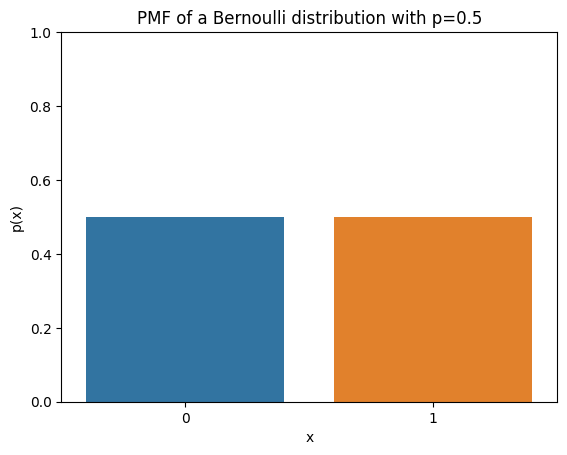

In [3]:
p = 0.5
x = np.arange(0, 2)
y = list(map(lambda x: pmf_bernoulli(x, p), x))

sns.barplot(x=x, y=y)
plt.xlabel("x"); plt.ylabel("p(x)"); plt.ylim(0,1)
plt.title(f'PMF of a Bernoulli distribution with p={p}')
plt.show()


Let's also create one for the Binomial distribution.

In [4]:
def pmf_binomial(x, n, p):
  """
  Computes the PMF of a Binomial distribution

  Args:
    x: the value of the random variable.
    n: number of trials
    p: the probability of success.

  Returns:
    The PMF.
  """
  if x < 0 or x > n:
    return 0
  bin_coef = np.math.factorial(n) / (np.math.factorial(x) * np.math.factorial(n - x))
  return bin_coef * p**x * (1-p)**(n-x)


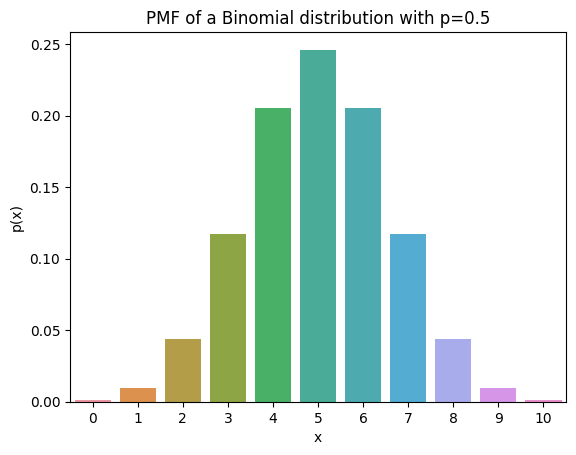

In [5]:
p = 0.5
n = 10
x = np.arange(0, n+1)
y = list(map(lambda x: pmf_binomial(x, n, p), x))

sns.barplot(x=x, y=y)
plt.xlabel("x"); plt.ylabel("p(x)")
plt.title(f'PMF of a Binomial distribution with p={p}')
plt.show()

As we saw in part 2, when $p=0.5$, the binomial distribution is always symmetrical. However, regardless of $p$, as the sample size grows large, it becomes more and more symmetrical, which is why the normal approximation exists.

## PDF's

The above works nicely for discrete $X$, but when $X$ is continuous, we need a new solution because it is impossible to create a bar for the infinite values of $X$. Thus, instead of summing the probabilities of all the $x$'s, we take the integral. So instead of all the probabilities summing to 1, instead, the *area under the curve* needs to be 1.

## Formal Definition

There are different definitions of PDF's, but when people refer to PDF's they are typically thinking of *absolutely continuous univariate* distributions like the normal distribution.

A random variable $X$ has density $f_X$, where $f_X$ is a non-negative Lebesgue-integrable (i.e., the function is well-behaved, takes non-negative values, and its integral over the entire range is finite, making it suitable for use as a probability density function) function, if:

$$\Pr[a\leq X\leq b]=\int_{a}^{b}f_X(x)dx$$

Hence, if $F_X$ is the CDF of $X$, then:
$$F_X(x)=\int_{-\infty}^{x}f_X(u)du$$

and (if $f_X$ is continuous at $x$)
$$f_X(x)=\frac{d}{dx}F_X(x)$$

Intuitively, one can think of $f_X(x)dx$ as being the probability of $X$ falling within the infinitesimal interval $[x,x+dx]$.

## Graphing PDF's

Much like PMFs, we know the PDF's of many distributions, such as the Normal distribution:

$${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$$




In [6]:
def pdf_normal(x, mu, sigma):
  """
  Computes the PDF of a Normal distribution

  Args:
    x: the value of the random variable.
    mu: mean
    sigma: standard deviation

  Returns:
    The PDF.
  """
  return (1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(((x - mu)/sigma) ** 2) / 2))


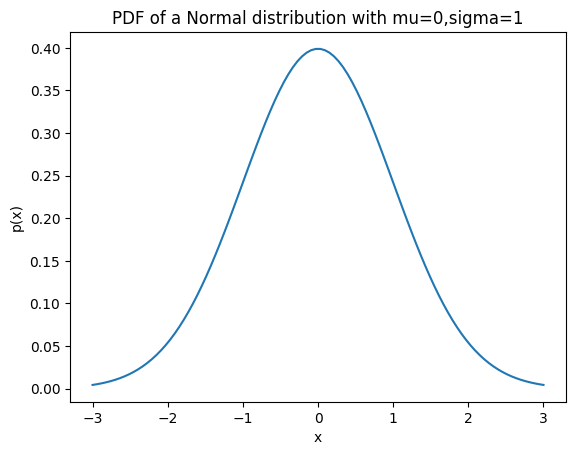

In [7]:
mu = 0
sigma = 1
x = np.linspace(-3,3,100)
y = list(map(lambda x: pdf_normal(x, mu, sigma), x))

sns.lineplot(x=x, y=y)
plt.xlabel("x"); plt.ylabel("p(x)")
plt.title(f'PDF of a Normal distribution with mu={mu},sigma={sigma}')
plt.show()

## Visualizing a One-Proportion $Z$-Test

In the above graph that visualizes the PDF of a standard normal, we see how as $|x|$ gets larger, the "rarer" the probability becomes. So it is more common to get $x=0.1$ than $x=3$. The question asked in a one-proportion $Z$-test is, if I got a value of let's say, $x=2$, is that realistic?

Remember in our example from part 2, our $z$-statistic was $2$. From then, we calculated the $p$-value (the probability of getting $x=2$ or more extreme. This means taking the area under the curve above graph where $|x|\geq 2$. Intuitively, the higher $|x|$, the lower the "area under the curve". Since we have set our $\alpha=0.05$, we are saying that if the area under the curve is smaller than $0.05$, we will reject the null.

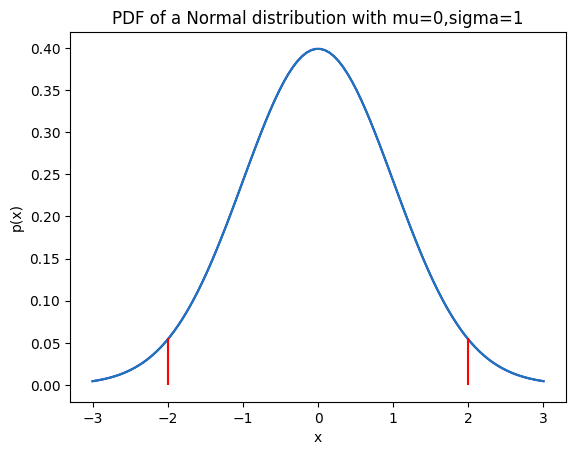

In [8]:
mu = 0
sigma = 1
x = np.linspace(-3,3,100)
y = list(map(lambda x: pdf_normal(x, mu, sigma), x))

sns.lineplot(x=x, y=y,color='blue')
plt.xlabel("x"); plt.ylabel("p(x)")
plt.title(f'PDF of a Normal distribution with mu={mu},sigma={sigma}')
sns.lineplot(x=x, y=y)
plt.vlines(x=2, ymin=0, ymax=pdf_normal(2,mu,sigma)+0.002, colors='red')
plt.vlines(x=-2, ymin=0, ymax=pdf_normal(2,mu,sigma)+0.002, colors='red')
plt.show()

In [9]:
import scipy.stats as st
z = 2
p_value = 2*(1 - st.norm.cdf(abs(z)))
print(p_value)

0.04550026389635842


As we see above, the area to the right of the right red bar plus the area to the left of the left bar is about $\approx 0.0455$.

## Critical Values

You may have noticed that to do this $p$-value comparison, we do the following:
1. calculate $z$ which is a value on the $x$-axis.
2. Use the relation between $x$ and $p(x)$ to get $p(x)$.
3. compare $p(x)$ with the $\alpha$, which is also a probability.

We can actually do the other way around, where,
1. calculate $z$ which is a value on the $x$-axis.
2. convert $\alpha=0.05$ into a value on the $x$-axis
3. Compare $z$ with the converted $\alpha$

The above 2 methods are equivalent. To show this, first notice how we are splitting the $\alpha$ into 2 equal values because we are doing a two-tailed test. Thus, each region is actually $\alpha/2$. Let's say we are interested in the critical value of the right side of the graph. Since the $p$-value is pretty close to $\alpha$, we should expect this critical value to be close to $2$ as well.

If $\Phi(x)$ is the CDF, since that means it is $P(X\leq x)$ of the standard normal, to get $P(X\geq x)$ we simply do $1-\Phi(x)$. We want to find the value of this that gets $\alpha/2$, thus $1-\Phi(x)=\alpha/2$. Moving terms around, we get:
$$\begin{align}\Phi(x)&=1-\alpha/2\\x&=\Phi^{-1}(1-\alpha/2)\end{align}$$



In [10]:
import scipy.stats as st
alpha = 0.05
print(st.norm.ppf(1 - alpha / 2))

1.959963984540054


As expected, it is pretty close to 2. This $\approx 1.96$ will (unsurprisingly) pop up a lot in future notebooks so stay tuned!

To summarize, the critical value and $p$-value approach is identical, it's just a matter of which value you decide to convert from $x$ to $p(x)$ and vice-versa.

Typically the $p$-value approach is preferred because the probability is "standardized" across all kinds of distributions.